In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("heartdisease_data.csv")
df.head()

,Age,Sex,Chestpain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3.0,2,0,0,2
1,44,1,4,130,209,0,1,127,0,0.0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0


In [3]:
df.tail()

,Age,Sex,Chestpain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
195,54,0,4,127,333,1,1,154,0,0.0,0,0,0,1
196,62,1,1,0,139,0,1,0,0,0.0,0,0,0,0
197,55,1,4,122,223,1,1,100,0,0.0,0,0,6,2
198,58,1,4,0,385,1,2,0,0,0.0,0,0,0,0
199,62,1,2,120,254,0,2,93,1,0.0,0,0,0,1


In [4]:
#Get the Number of Rows and Columns
df.shape

(200, 14)

In [5]:
df.describe()

,Age,Sex,Chestpain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,96.310000,172.490000,0.340000,0.735000,90.25500,0.475000,0.951000,1.045000,0.0,1.070000,1.520000
std,7.811697,0.171015,0.795701,62.917781,116.752497,0.474898,0.683455,57.50237,0.500628,1.110344,1.166093,0.0,2.427874,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.500000,0.000000,0.0,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,111.50000,0.000000,0.500000,0.000000,0.0,0.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.00000,1.000000,2.000000,2.000000,0.0,0.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.00000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


In [6]:
df.dropna(inplace=True)

In [7]:
df.dtypes

Age            int64
Sex            int64
Chestpain      int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
target         int64
dtype: object

In [8]:
df.isnull()

,Age,Sex,Chestpain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Age          0
Sex          0
Chestpain    0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [10]:
df['Age'].value_counts()

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64

In [11]:
df.size

2800

In [12]:
df.groupby('target').size()

target
0    51
1    56
2    41
3    42
4    10
dtype: int64

In [13]:
df.groupby('target').sum()

,Age,Sex,Chestpain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,2898,48,161,4157,8754,14,41,3998,12,22.3,30,0,47
1,3224,53,204,5642,9487,22,40,5329,28,42.8,59,0,99
2,2503,41,151,4504,6059,13,30,4198,24,50.1,56,0,48
3,2623,42,148,3895,8304,15,26,3579,24,50.5,47,0,20
4,622,10,37,1064,1894,4,10,947,7,24.5,17,0,0


In [14]:
df.skew()

Age         -0.404091
Sex         -5.552105
Chestpain   -1.648734
trestbps    -0.750363
chol        -0.469975
fbs          0.680636
restecg      0.391463
thalach     -0.715818
exang        0.100883
oldpeak      0.823429
slope        0.468819
ca           0.000000
thal         1.905183
target       0.297393
dtype: float64

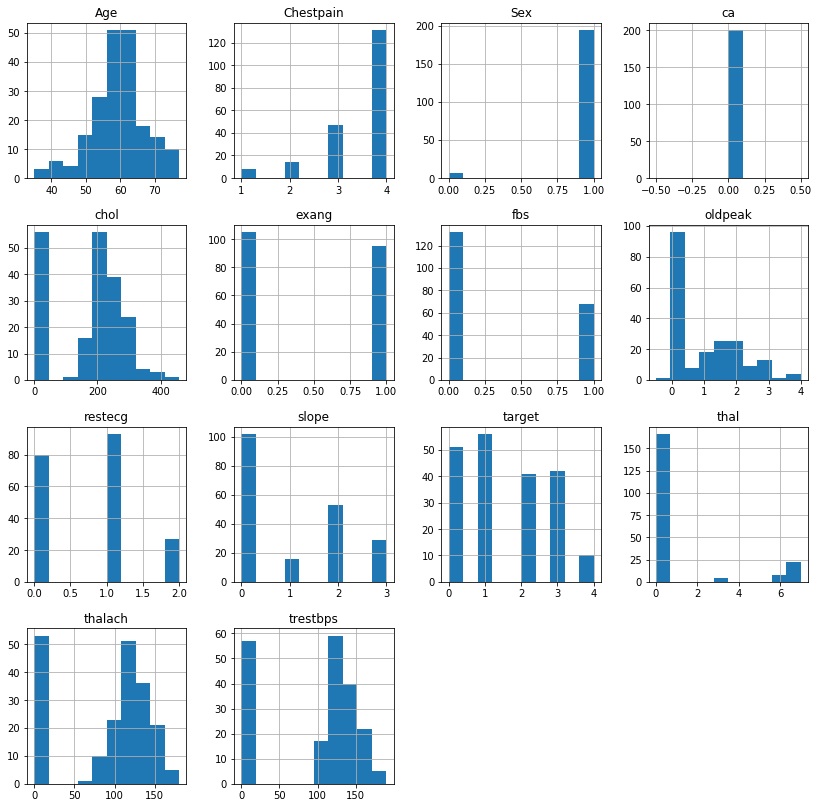

In [15]:
df.hist(figsize=(14,14))
plt.show()

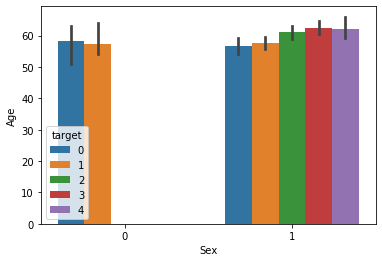

In [16]:
sns.barplot(x=df['Sex'],y=df['Age'],hue=df['target'])

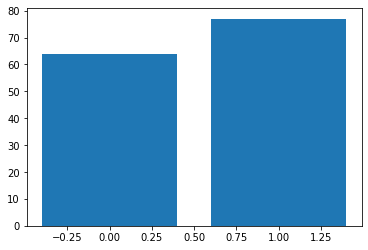

In [17]:
plt.bar(x=df['Sex'],height=df['Age'])
plt.show()

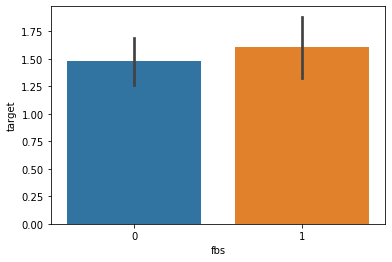

In [18]:
sns.barplot(df["fbs"],df['target'])

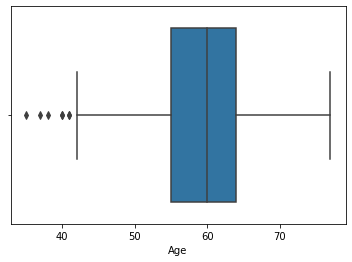

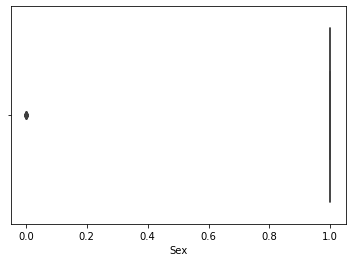

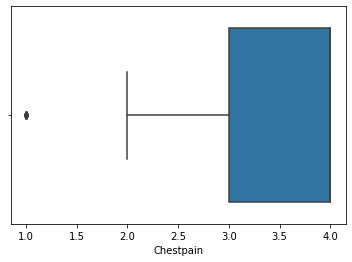

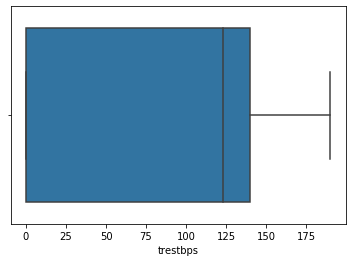

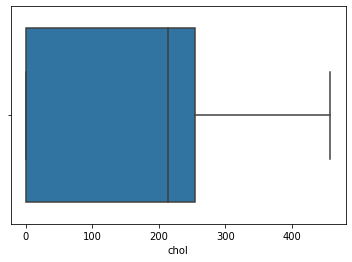

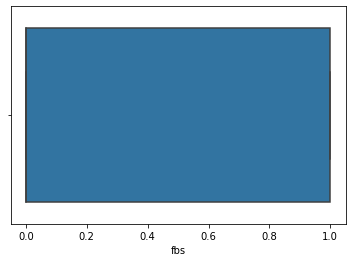

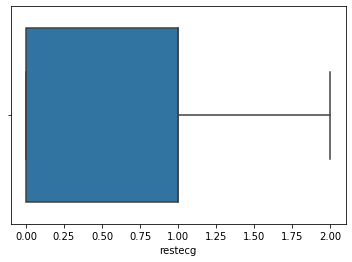

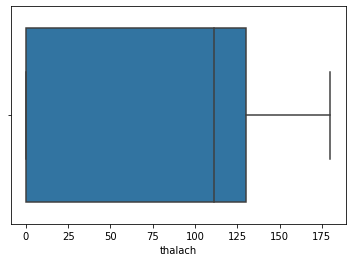

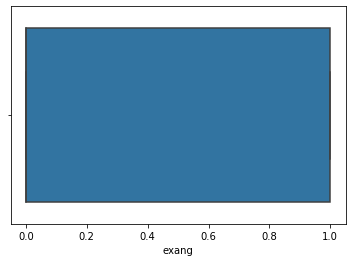

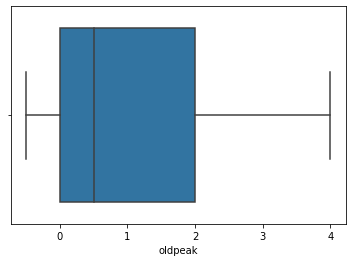

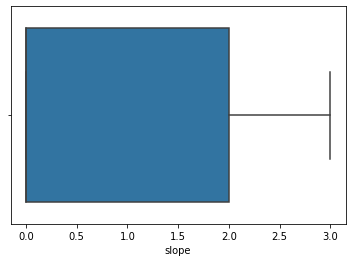

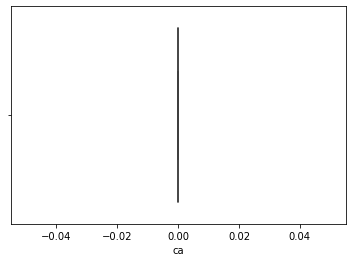

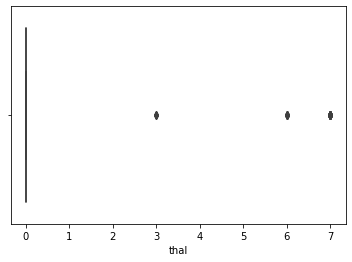

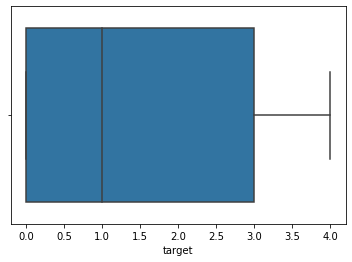

In [19]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

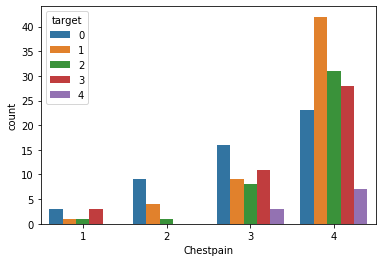

In [20]:
sns.countplot(df['Chestpain'],hue=df['target'])

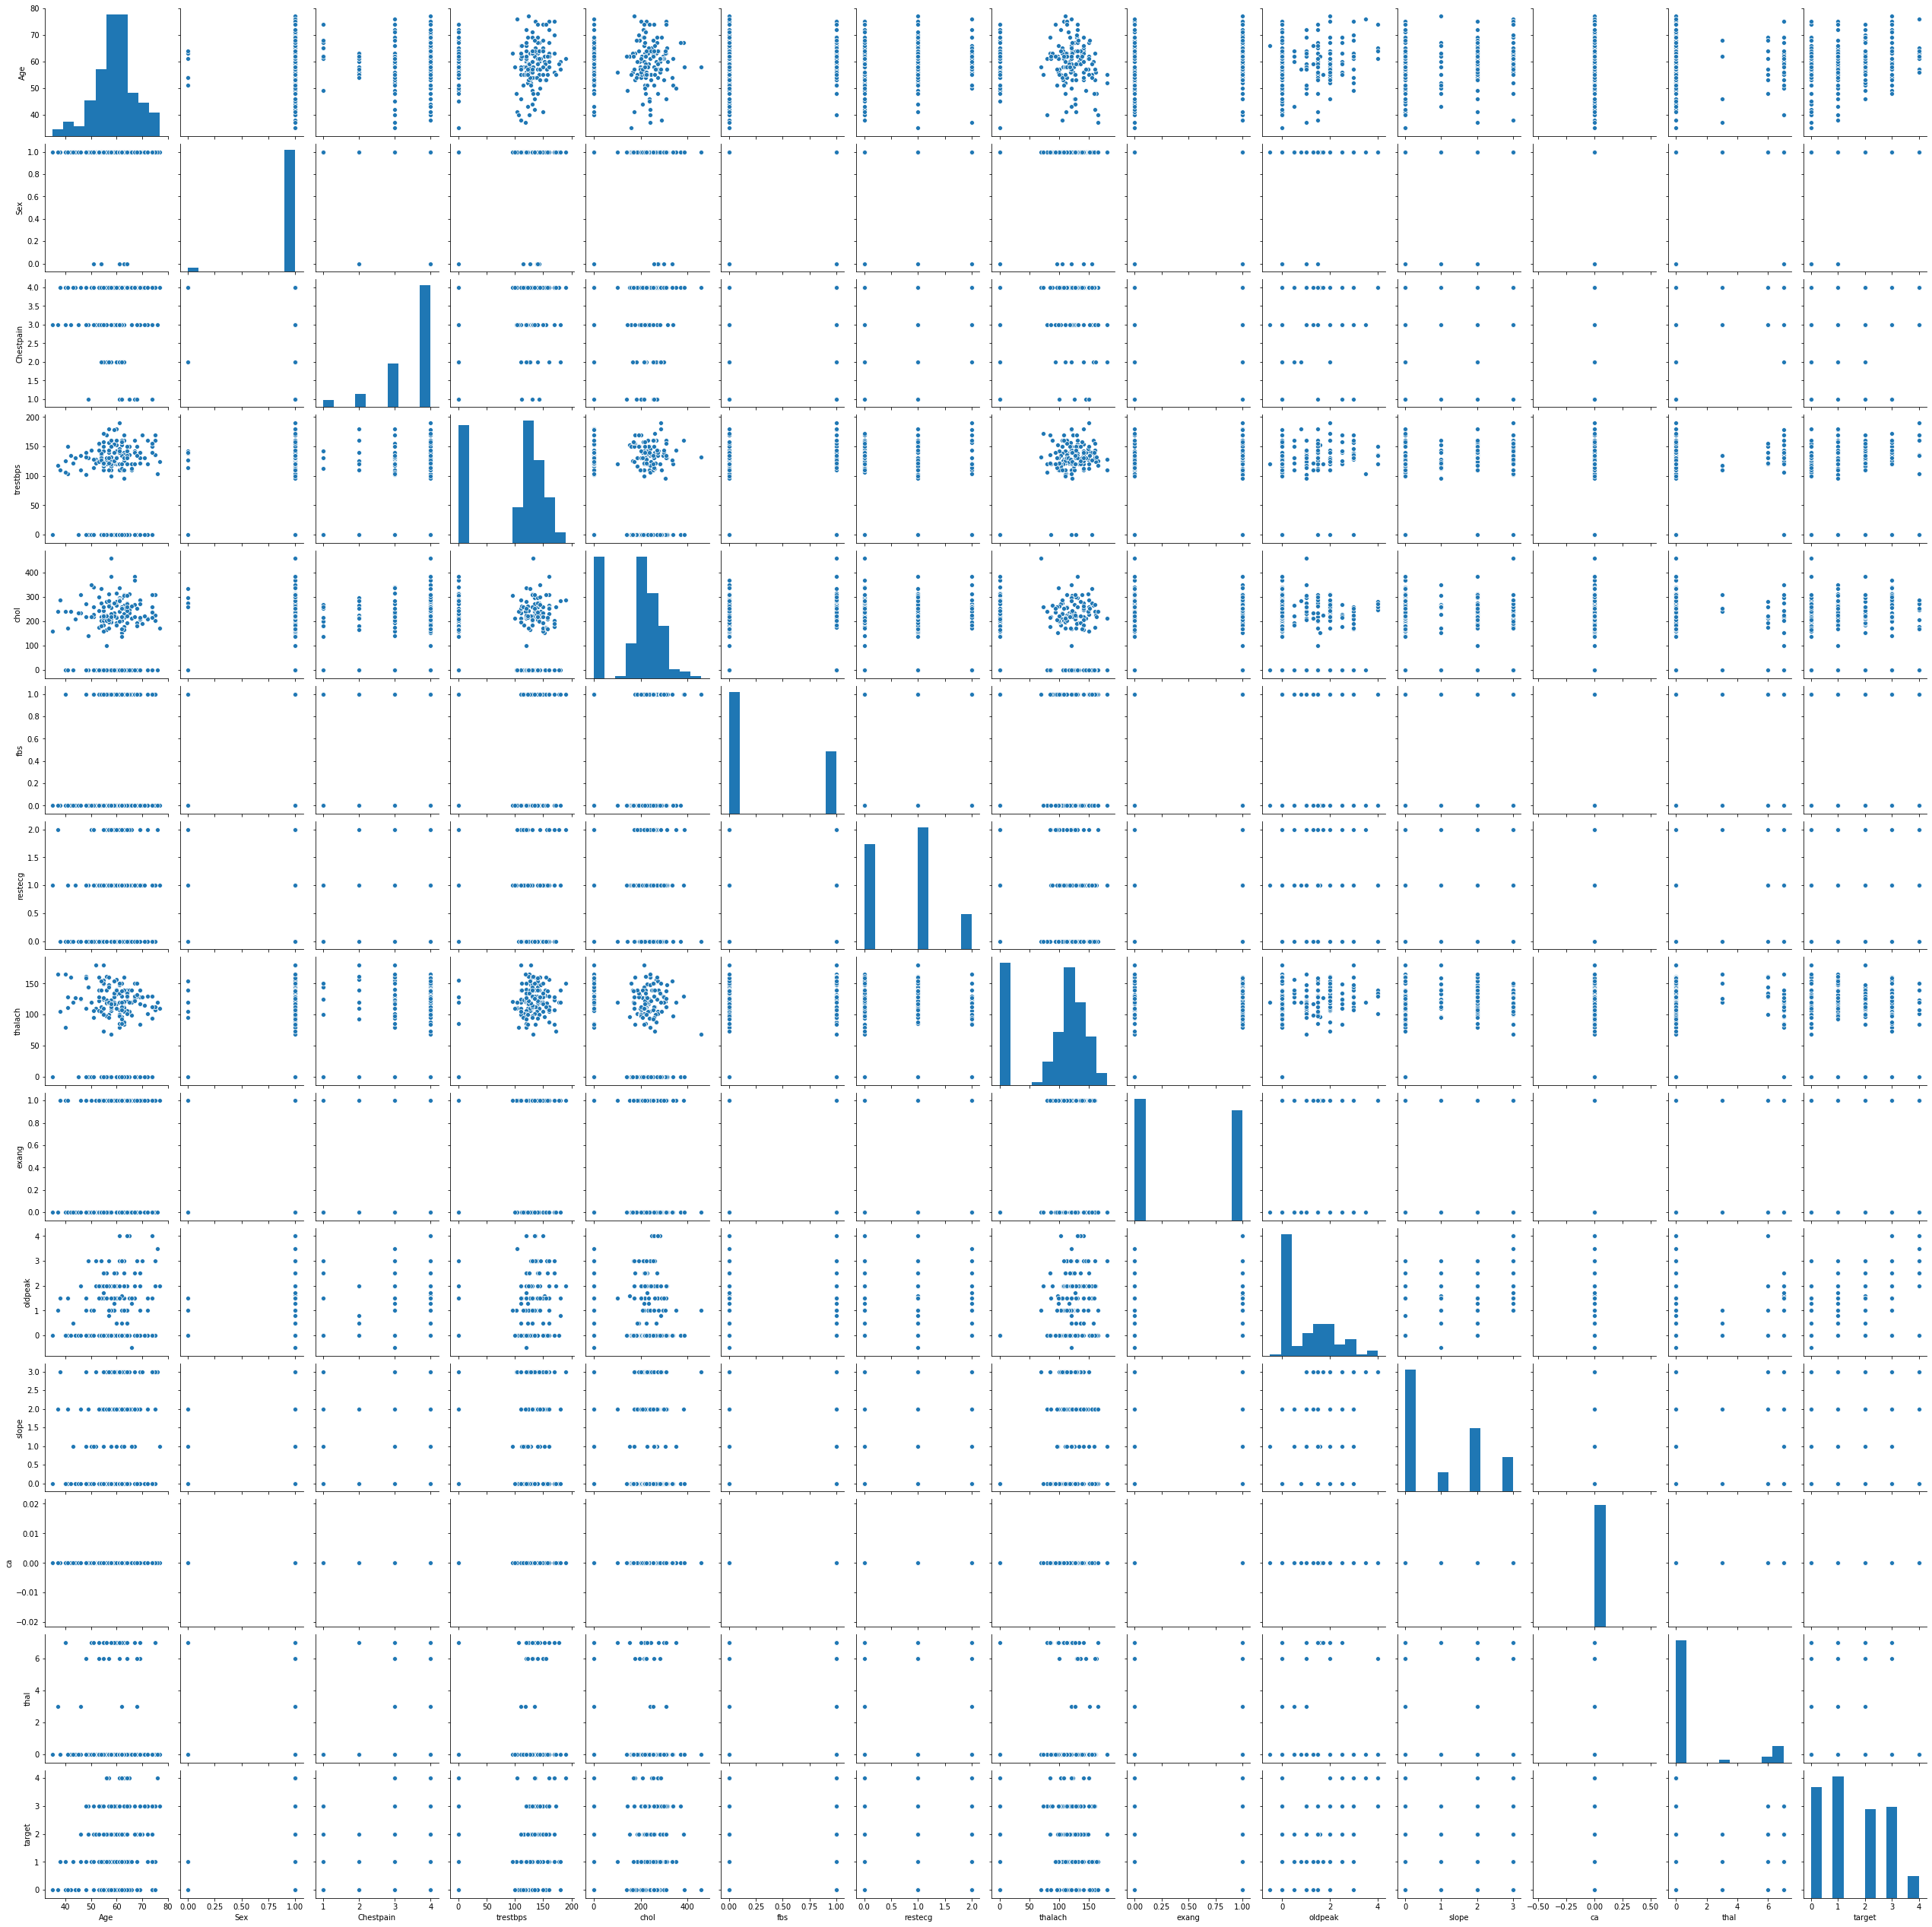

In [21]:
sns.pairplot(df)

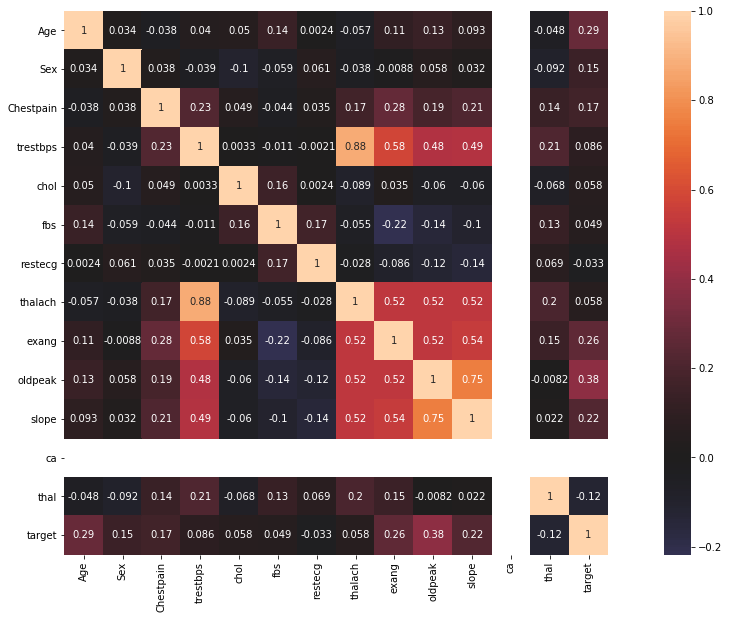

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,square=True,center=0)
plt.show()

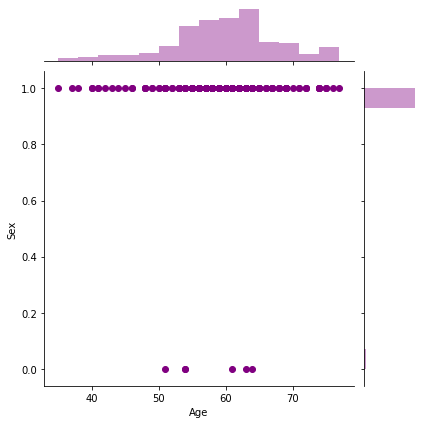

In [23]:
sns.jointplot(x='Age',y='Sex',data=df, color='purple')

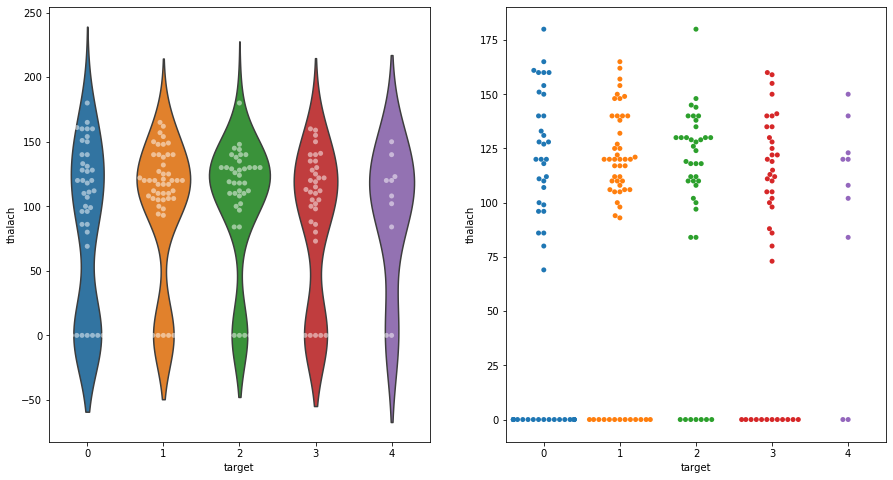

In [24]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=df, inner=None)
sns.swarmplot(x="target", y="thalach", data=df, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=df)
plt.show()

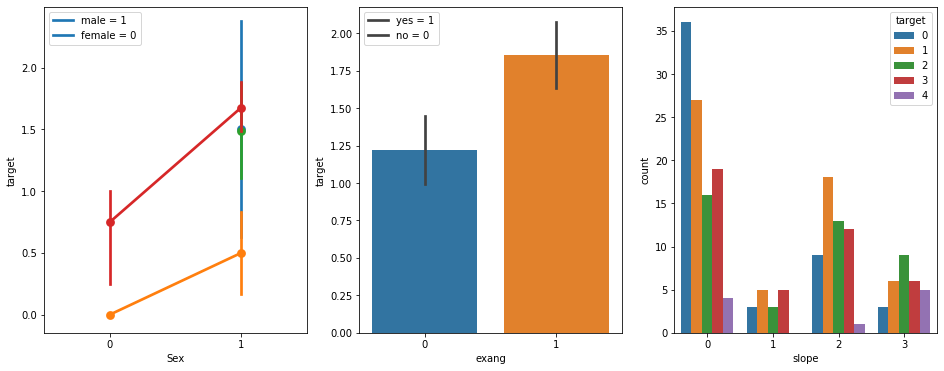

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="Sex", y="target", hue='Chestpain', data=df)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=df)
plt.show()

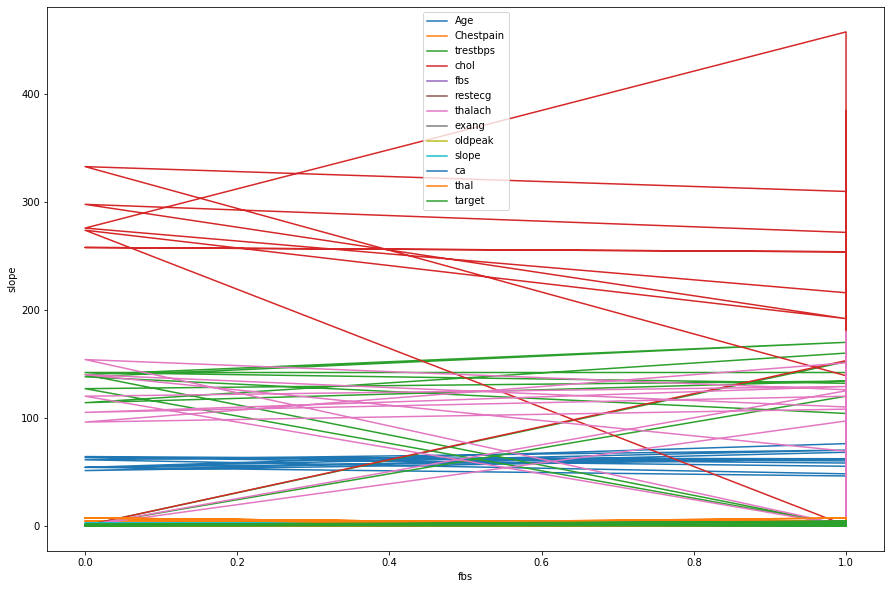

In [26]:
ax = df.set_index('Sex').plot(figsize=(15, 10))
ax.set_ylabel('slope')
ax.set_xlabel('fbs')

plt.show()

Data Preprocessing

In [27]:
df['ca'].value_counts()

0    200
Name: ca, dtype: int64

In [28]:
df['ca'].unique()

array([0], dtype=int64)

In [29]:
df['target'].sum()

304

In [30]:
x=df.loc[:,:'thal']
y=df.loc[:,'target']

In [31]:
sdr = StandardScaler()
x = sdr.fit_transform(x)

Train Test Split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [33]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
prediction=dt.predict(x_test)
accuracy_dt=accuracy_score(y_test,prediction)*100
accuracy_dt

25.0

In [35]:
print("Accuracy on training set: {:.3f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.250


In [36]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.14328862 0.         0.08319221 0.11738108 0.15387333 0.03551459
 0.07104899 0.21209281 0.04769475 0.07186343 0.00953159 0.
 0.0545186 ]


In [37]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [38]:
prediction_knn=knn.predict(x_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
accuracy_knn

30.0

In [39]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

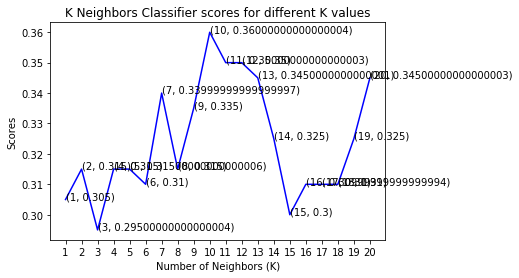

In [40]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [41]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction_knn=knn.predict(x_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))
scores

{1: 0.23333333333333334,
 2: 0.26666666666666666,
 3: 0.21666666666666667,
 4: 0.3,
 5: 0.2833333333333333,
 6: 0.31666666666666665,
 7: 0.35,
 8: 0.3333333333333333,
 9: 0.31666666666666665,
 10: 0.4,
 11: 0.36666666666666664,
 12: 0.38333333333333336,
 13: 0.38333333333333336,
 14: 0.3333333333333333,
 15: 0.3333333333333333,
 16: 0.35,
 17: 0.3333333333333333,
 18: 0.35,
 19: 0.4,
 20: 0.38333333333333336,
 21: 0.4,
 22: 0.38333333333333336,
 23: 0.38333333333333336,
 24: 0.4,
 25: 0.4}

In [42]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

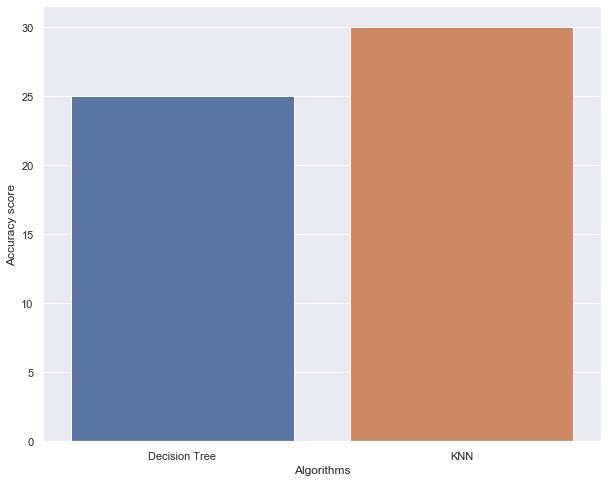

In [43]:
sns.set(rc={'figure.figsize':(10,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [44]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [45]:
score.mean()

0.355

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
from sklearn.externals import joblib
joblib.dump(score,'Heartdisease.obj')

['Heartdisease.obj']